In [1]:
library(forecast)
library(readr)accuracy(arimaFC, rev_ts)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.3 



In [3]:
NIJ2013_JAN01_DEC31 <- read_csv("~/Desktop/DataScience/hack-university-data-science/Projects/2016-fall/Kayla/Project/NIJ2013_JAN01_DEC31.csv", col_types = cols(occ_date = col_date(format = "%m/%d/%Y")))

In [5]:
NIJ2015_JAN01_DEC31 <- read_csv("~/Desktop/DataScience/hack-university-data-science/Projects/2016-fall/Kayla/Project/NIJ2015_JAN01_DEC31.csv", col_types = cols(occ_date = col_date(format = "%m/%d/%Y")))

In [6]:
NIJ2014_JAN01_DEC31<- read_csv("~/Desktop/DataScience/hack-university-data-science/Projects/2016-fall/Kayla/Project/NIJ2014_JAN01_DEC31.csv", col_types = cols(occ_date = col_date(format = "%m/%d/%Y")))

In [43]:
NIJ2016_JAN01_DEC31 <- read_csv("NIJ2016_JAN01_JUL31.csv", col_types = cols(occ_date = col_date(format = "%m/%d/%Y")))

In [7]:
#combined all into one dataframe
#holding out 2016 data for comparison
all <- rbind(NIJ2013_JAN01_DEC31, NIJ2014_JAN01_DEC31, NIJ2015_JAN01_DEC31)

In [8]:
#made table from count of crimes (row) per date
count_table <- table(all$occ_date)
count_table


2013-01-01 2013-01-02 2013-01-03 2013-01-04 2013-01-05 2013-01-06 2013-01-07 
       453        415        403        444        398        399        451 
2013-01-08 2013-01-09 2013-01-10 2013-01-11 2013-01-12 2013-01-13 2013-01-14 
       398        380        399        442        393        375        368 
2013-01-15 2013-01-16 2013-01-17 2013-01-18 2013-01-19 2013-01-20 2013-01-21 
       365        378        412        443        435        406        378 
2013-01-22 2013-01-23 2013-01-24 2013-01-25 2013-01-26 2013-01-27 2013-01-28 
       351        364        425        419        421        349        359 
2013-01-29 2013-01-30 2013-01-31 2013-02-01 2013-02-02 2013-02-03 2013-02-04 
       367        402        424        498        471        426        431 
2013-02-05 2013-02-06 2013-02-07 2013-02-08 2013-02-09 2013-02-10 2013-02-11 
       422        422        415        445        434        394        420 
2013-02-12 2013-02-13 2013-02-14 2013-02-15 2013-02-16 2013-02-

In [11]:
str(count_table)

 'table' int [1:1095(1d)] 453 415 403 444 398 399 451 398 380 399 ...
 - attr(*, "dimnames")=List of 1
  ..$ : chr [1:1095] "2013-01-01" "2013-01-02" "2013-01-03" "2013-01-04" ...


In [18]:
#made table into a dataframe
count_df <- as.data.frame(count_table)
count_df

Var1,Freq
2013-01-01,453
2013-01-02,415
2013-01-03,403
2013-01-04,444
2013-01-05,398
2013-01-06,399
2013-01-07,451
2013-01-08,398
2013-01-09,380
2013-01-10,399


In [22]:
str(count_df)

'data.frame':	1095 obs. of  2 variables:
 $ Var1: Factor w/ 1095 levels "2013-01-01","2013-01-02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq: int  453 415 403 444 398 399 451 398 380 399 ...


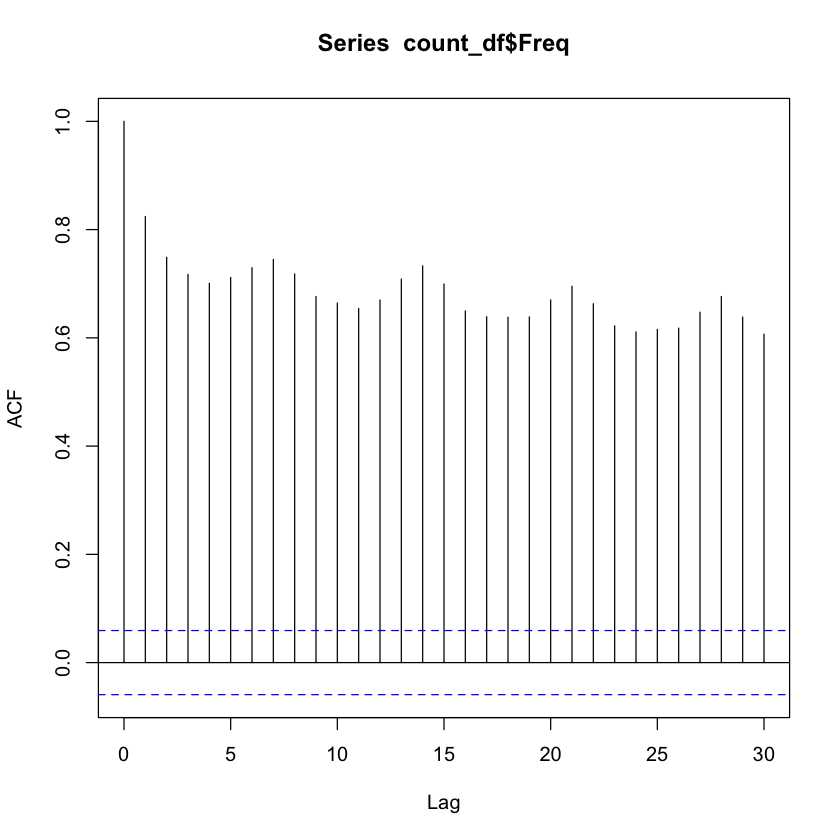

In [24]:
#autocorrelation
count_acf <- acf(count_df$Freq)
plot(count_acf)

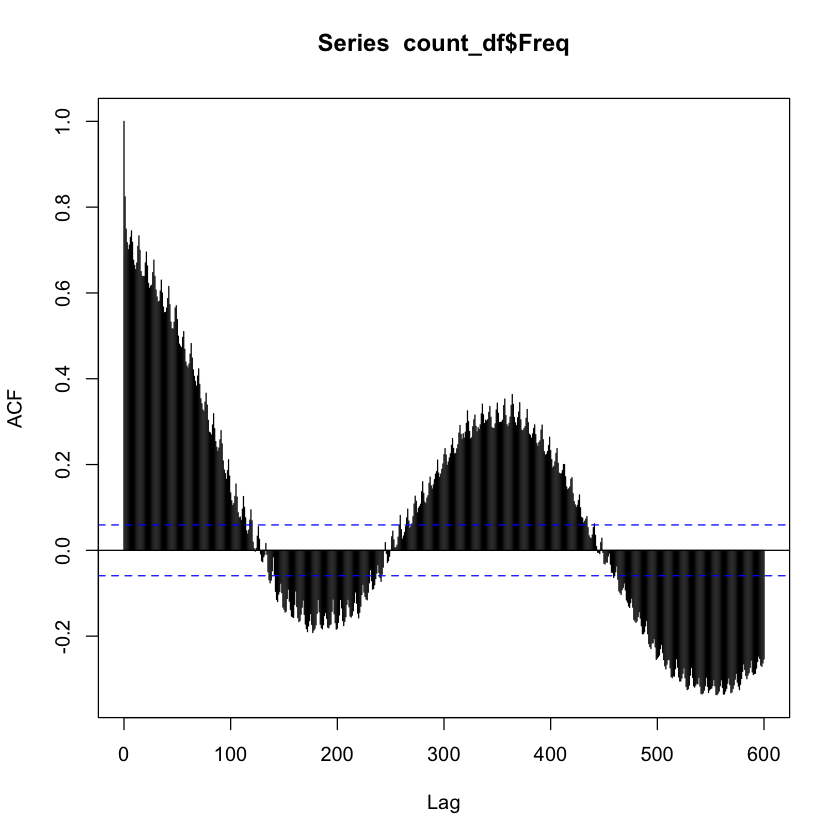

In [48]:
#ACF up to 365 days ago
count_acf <- acf(count_df$Freq, lag.max = 600)
plot(count_acf)

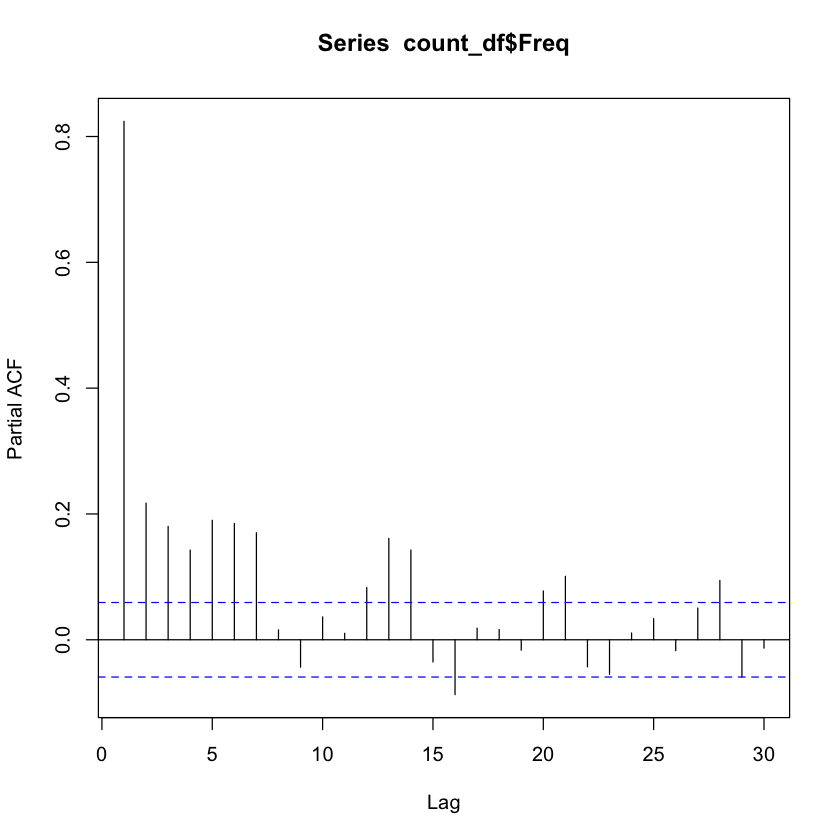

In [27]:
#PACF
count_pacf <- pacf(count_df$Freq)
plot(count_pacf)

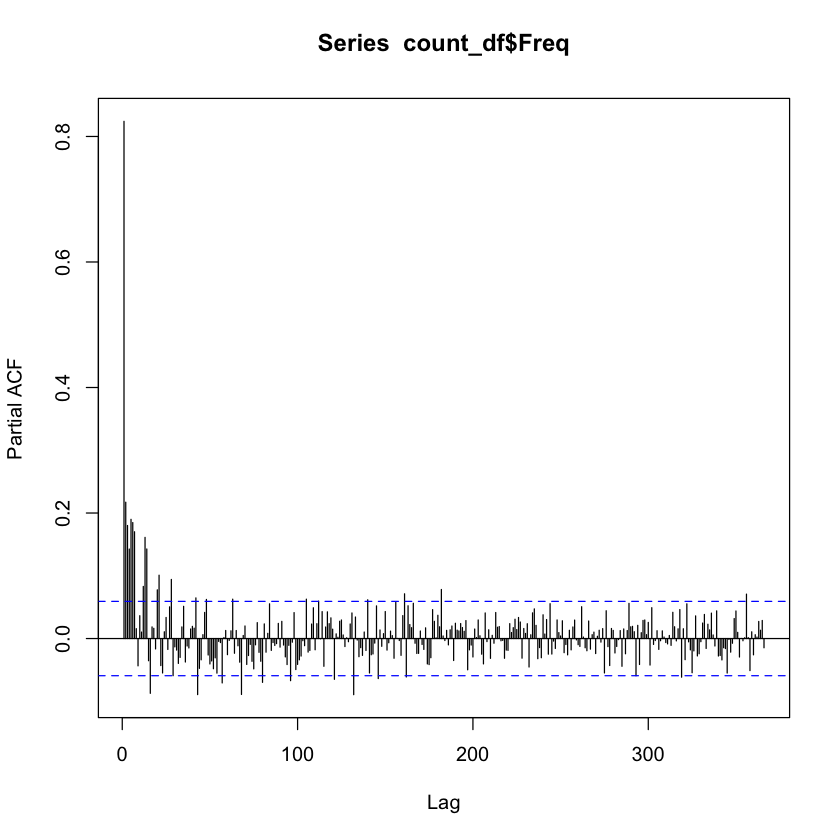

In [33]:
#PACF up to 365 days
count_pacf <- pacf(count_df$Freq, lag.max = 366)
plot(count_pacf)

In [38]:
count_arima <- auto.arima(count_df$Freq)
summary(count_arima)

Series: count_df$Freq 
ARIMA(1,1,1)                    

Coefficients:
         ar1      ma1
      0.3616  -0.9037
s.e.  0.0334   0.0139

sigma^2 estimated as 1588:  log likelihood=-5583.37
AIC=11172.75   AICc=11172.77   BIC=11187.74

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.4685874 39.79573 30.92762 -0.4679182 6.060689 0.8512118
                   ACF1
Training set 0.01358231


In [39]:
arimaFC <- forecast.Arima(count_arima)

In [40]:
arimaFC

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1096       511.1991 460.1288 562.2694 433.0938 589.3043
1097       508.0165 451.8457 564.1873 422.1106 593.9224
1098       506.8656 449.1238 564.6074 418.5572 595.1741
1099       506.4494 447.8890 565.0098 416.8890 596.0098
1100       506.2989 447.1323 565.4656 415.8114 596.7865
1101       506.2445 446.5428 565.9462 414.9387 597.5504
1102       506.2248 446.0153 566.4344 414.1423 598.3074
1103       506.2177 445.5125 566.9229 413.3771 599.0583
1104       506.2151 445.0211 567.4092 412.6269 599.8034
1105       506.2142 444.5362 567.8922 411.8858 600.5426

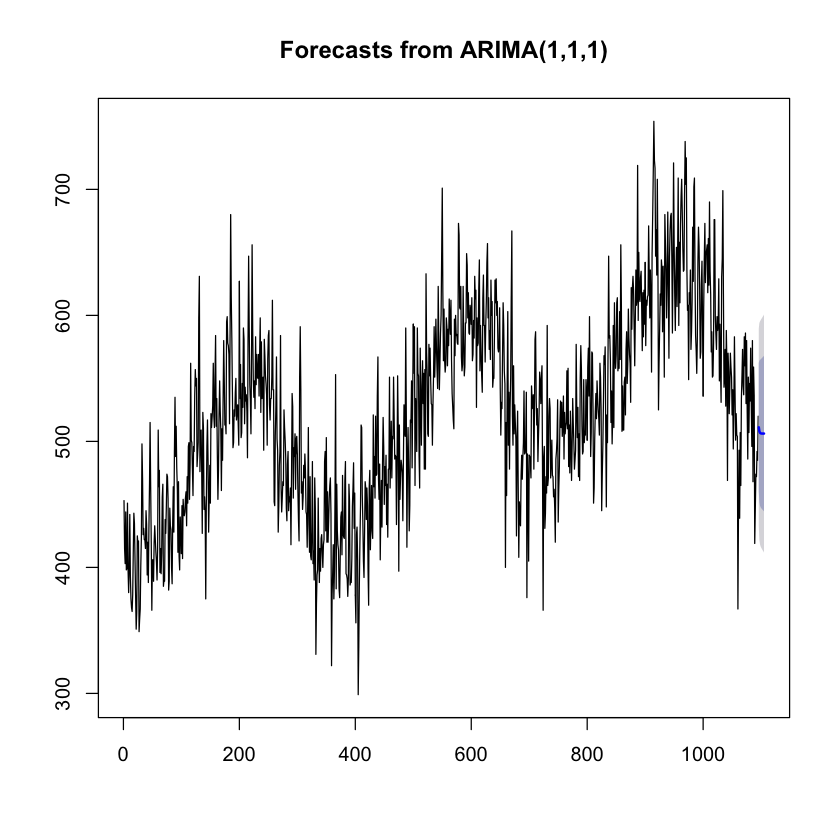

In [41]:
plot.forecast(arimaFC)

In [44]:
table_2016 <- table(NIJ2016_JAN01_DEC31$occ_date)
table_2016


2016-01-01 2016-01-02 2016-01-03 2016-01-04 2016-01-05 2016-01-06 2016-01-07 
       536        478        490        407        469        503        505 
2016-01-08 2016-01-09 2016-01-10 2016-01-11 2016-01-12 2016-01-13 2016-01-14 
       546        474        516        533        479        522        493 
2016-01-15 2016-01-16 2016-01-17 2016-01-18 2016-01-19 2016-01-20 2016-01-21 
       534        522        460        489        504        534        481 
2016-01-22 2016-01-23 2016-01-24 2016-01-25 2016-01-26 2016-01-27 2016-01-28 
       566        593        522        560        514        550        505 
2016-01-29 2016-01-30 2016-01-31 2016-02-01 2016-02-02 2016-02-03 2016-02-04 
       566        528        516        519        552        507        557 
2016-02-05 2016-02-06 2016-02-07 2016-02-08 2016-02-09 2016-02-10 2016-02-11 
       597        542        556        561        531        572        560 
2016-02-12 2016-02-13 2016-02-14 2016-02-15 2016-02-16 2016-02-

In [47]:
accuracy(arimaFC, table_2016)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.4685874,39.79573,30.92762,-0.4679182,6.060689,0.8512118,0.01358231
Test set,-14.5945951,39.76199,29.46840,-3.5983551,6.360284,NA,NA
